In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("golf_dataset_long_format.csv")
df.head()

,Temperature,Humidity,Wind,Outlook,Play
0,3.3,49,1,3,1
1,3.3,49,1,3,0
2,3.3,49,1,3,0
3,3.3,49,1,3,1
4,3.3,49,1,3,1


In [3]:
cols = list(df.columns)
print(cols)

['Temperature', 'Humidity', 'Wind', 'Outlook', 'Play']


In [4]:
df.shape

(7665, 5)

In [5]:
corrmat = df.corr()
top_corr_features = corrmat.index
corrmat

,Temperature,Humidity,Wind,Outlook,Play
Temperature,1.000000,0.683181,-0.162446,-0.113775,-0.021652
Humidity,0.683181,1.000000,-0.115711,-0.139317,-0.096551
Wind,-0.162446,-0.115711,1.000000,-0.028279,-0.054290
Outlook,-0.113775,-0.139317,-0.028279,1.000000,0.068390
Play,-0.021652,-0.096551,-0.054290,0.068390,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

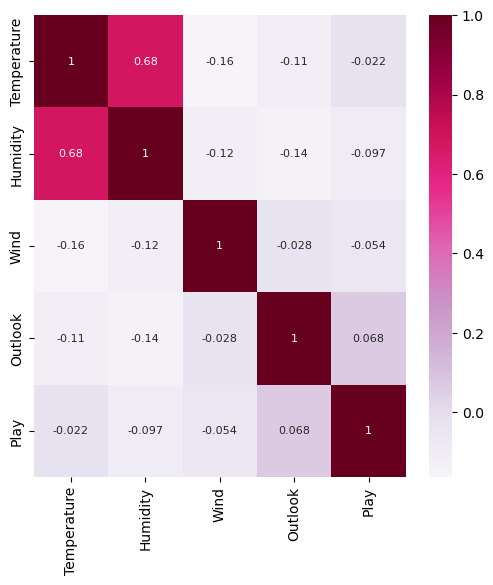

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="PuRd", annot_kws={"fontsize":8})

In [8]:
feature_cols= df.columns.drop(['Play'])
print(feature_cols)

Index(['Temperature', 'Humidity', 'Wind', 'Outlook'], dtype='object')


In [9]:
X = df[feature_cols]
X.head()

,Temperature,Humidity,Wind,Outlook
0,3.3,49,1,3
1,3.3,49,1,3
2,3.3,49,1,3
3,3.3,49,1,3
4,3.3,49,1,3


In [10]:
y = df.Play
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Play, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 30)

In [13]:
len(y_train)

4982

In [14]:
len(y_test)

2683

In [15]:
from sklearn.svm import SVC
clf = SVC(kernel= 'rbf', random_state = 30)

In [16]:
model= clf.fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_test)

In [18]:
len(y_pred)

2683

In [19]:
len(y_test)

2683

In [20]:
y = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
y.head()

,Actual,Predicted
1736,0,0
6056,0,0
7651,0,0
4467,1,0
7340,0,0


In [21]:
y.tail()

,Actual,Predicted
2249,0,0
5956,0,0
1675,0,0
948,0,0
684,0,0


In [22]:
y.sample(10)

,Actual,Predicted
99,1,0
7221,0,0
1150,0,0
6741,0,0
5138,0,0
2843,1,0
6954,0,0
1592,0,0
5145,0,0
4924,0,0


In [23]:
from sklearn import metrics

In [24]:
c_mtrx = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(c_mtrx)

Confusion Matrix
[[2181    0]
 [ 502    0]]


Text(0.5, 1.0, 'Confusion Matrix')

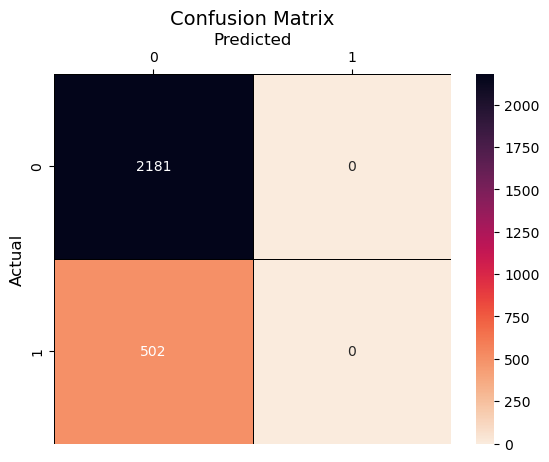

In [25]:
# Create the heatmap
ax = sns.heatmap(c_mtrx, annot=True, fmt='d', cbar=True, cmap="rocket_r", linewidths=.5, linecolor='black')
# fmt='d' for integer format, using a colormap similar to the image

# Set predicted labels on top
ax.xaxis.tick_top() # Move the x-axis ticks (Predicted labels) to the top
ax.xaxis.set_label_position('top') # Move the x-axis label ('Predicted') to the top

# Set the axis labels and title
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

In [26]:
#[row, column]
#(Actual, Predict)
TN = c_mtrx[0, 0]
FP = c_mtrx[0, 1]
FN = c_mtrx[1, 0]
TP = c_mtrx[1, 1]

print("TN: ", TN, "\tFP: ", FP)
print("FN: ", FN, "\tTP: ", TP)

TN:  2181 	FP:  0
FN:  502 	TP:  0


In [27]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix
Accuracy:	 0.8128960119269475
Sensitivity:	 0.0
Specificity:	 1.0
Precision:	 0.0
Classification Eerror: 0.1871039880730525
False_Positive_Rate: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
count0 = df['Play'][df.Play == 0].count()

count1 = df['Play'][df.Play == 1].count()

print("Actual Dataset")
print("0's:",count0)
print("1's:",count1)

Actual Dataset
0's: 6266
1's: 1399


In [29]:
Trcount0 = sum(y_train==0)
Trcount1 = sum(y_train==1)

print("Trained Dataset")
print("0's:",Trcount0)
print("1's:",Trcount1)

Trained Dataset
0's: 4085
1's: 897


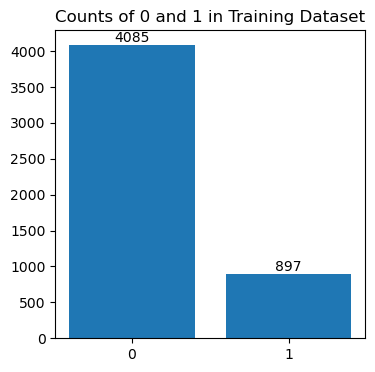

In [30]:
# Plotting the bar chart
labels = ['0', '1']
counts = [Trcount0, Trcount1]
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)
# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()